Скачивание файлов и распаковка

In [14]:
!wget https://storage.yandexcloud.net/selftest/XR-CHESTPAT-type%20II-v1.zip

--2024-07-11 06:46:07--  https://storage.yandexcloud.net/selftest/XR-CHESTPAT-type%20II-v1.zip
Resolving storage.yandexcloud.net (storage.yandexcloud.net)... 213.180.193.243, 2a02:6b8::1d9
Connecting to storage.yandexcloud.net (storage.yandexcloud.net)|213.180.193.243|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2114221727 (2.0G) [application/x-zip-compressed]
Saving to: ‘XR-CHESTPAT-type II-v1.zip’

XR-CHESTPAT-type II 100%[===================>]   1.97G  8.04MB/s    in 3m 52s  

2024-07-11 06:49:59 (8.68 MB/s) - ‘XR-CHESTPAT-type II-v1.zip’ saved [2114221727/2114221727]



In [15]:
!unzip XR-CHESTPAT-type\ II-v1.zip
!rm XR-CHESTPAT-type\ II-v1.zip
!cd XR-CHESTPAT-type\ II-v1

Archive:  XR-CHESTPAT-type II-v1.zip
   creating: XR-CHESTPAT-type II-v1/
   creating: XR-CHESTPAT-type II-v1/dicom_data_179_cases_anon/
   creating: XR-CHESTPAT-type II-v1/dicom_data_179_cases_anon/0000/
  inflating: XR-CHESTPAT-type II-v1/dicom_data_179_cases_anon/0000/2.25.219644760464561835559440660434666268491.dcm  
   creating: XR-CHESTPAT-type II-v1/dicom_data_179_cases_anon/0001/
  inflating: XR-CHESTPAT-type II-v1/dicom_data_179_cases_anon/0001/2.25.116990345302191816095627115112644494523.dcm  
  inflating: XR-CHESTPAT-type II-v1/dicom_data_179_cases_anon/0001/2.25.77802121445226211256695467801427780864.dcm  
   creating: XR-CHESTPAT-type II-v1/dicom_data_179_cases_anon/0002/
  inflating: XR-CHESTPAT-type II-v1/dicom_data_179_cases_anon/0002/2.25.296017420079134340381414144840862165453.dcm  
   creating: XR-CHESTPAT-type II-v1/dicom_data_179_cases_anon/0003/
  inflating: XR-CHESTPAT-type II-v1/dicom_data_179_cases_anon/0003/2.25.92897579869386904415845136783159030968.dcm  
   

In [38]:
%cd XR-CHESTPAT-type\ II-v1
!mv dicom_data_179_cases_anon ./..
%cd ..
%rm -r XR-CHESTPAT-type\ II-v1

[Errno 2] No such file or directory: 'XR-CHESTPAT-type II-v1'
/home/kali/Desktop/XR-CHESTPAT-type II-v1
/home/kali/Desktop


Импортируем библиотеки

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import os
import matplotlib.pyplot as plt
import pydicom
import pydicom.data

>Создадим словарь stat, который заполним всеми имеющимися тегами из всех файлов исследований (в разных слледованиях теги различаются). Затем пройдёмся по каждому тегу в каждом исследовании, если в значении тега есть информация, то добавим в словарь единицу, если значение тега пусто - добавим 0.

>Получим словарь: название тега - список, с информацией о том, сколько раз он встретился (длина списка) и заполненостью. Далее в словаре aver соотнесём название тега со средним значением заполняемости. Из этого построим график.

>Полученный график читать неудобно, практичнее будет убрать теги, со 100% заполняемостью.

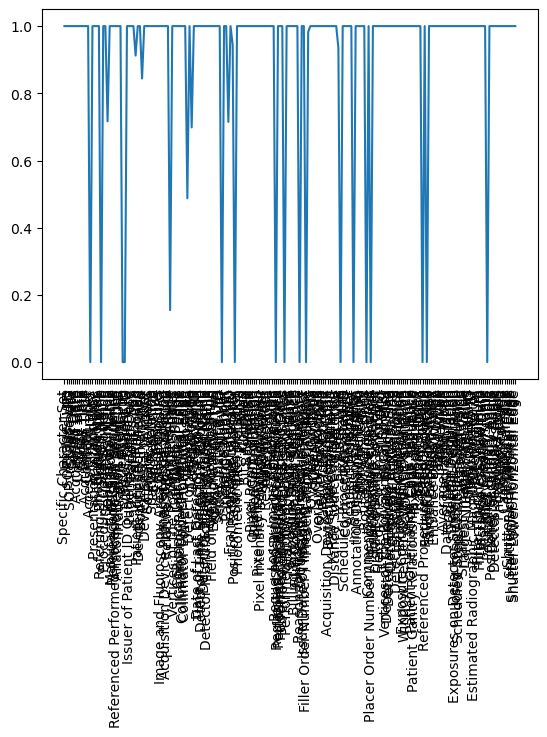

In [49]:
stat = {}
os.chdir('dicom_data_179_cases_anon')
for dir in os.listdir():
    os.chdir(dir)
    for file in os.listdir():
        ds = pydicom.dcmread(file)
        for element in ds:
            stat[element.description()] = []
    os.chdir('..')

for dir in os.listdir():
    os.chdir(dir)
    for file in os.listdir():
        ds = pydicom.dcmread(file)
        for element in ds:
            if element.value == '':
                stat[element.description()].append(0)
            if element.value != '':
                stat[element.description()].append(1)
    os.chdir('..')

aver = {}
for i in stat:
    aver[i] = (stat[i].count(1)/len(stat[i]))
x=[]
y=[]
tik = []
k=1
for i in aver:
    x.append(k)
    k+=1
    y.append(aver[i])
    tik.append(i)

plt.xticks(x, tik)
plt.xticks (rotation= 90 )
plt.plot(x, y)
plt.show()

Чтобы определить частоту встречаемости тегов среди исследований, поделим число встреч данного тега на общее число исследований - 288.

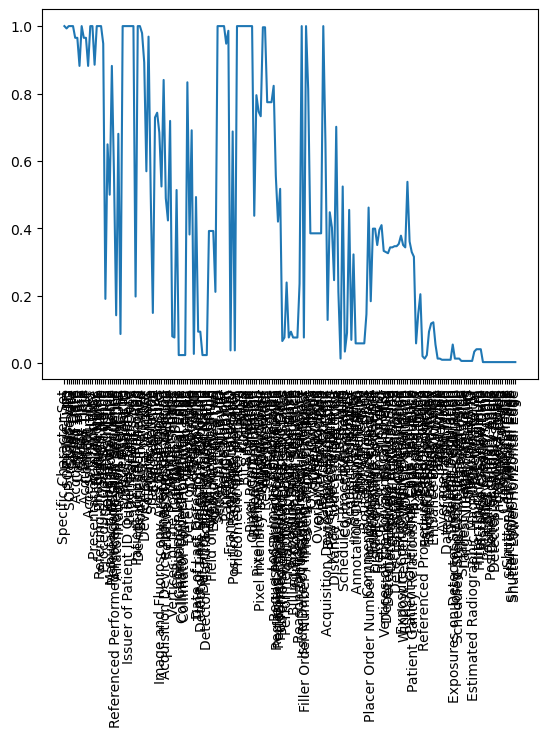

In [50]:
y=[]
tik=[]
for i in stat:
    y.append(len(stat[i])/288)
    tik.append(i)

plt.xticks(x, tik)
plt.xticks (rotation= 90 )
plt.plot(x, y)
plt.show()